# 🎸 Sound Check: Exploring the Stones' Sonic Landscape

Welcome back to our data-driven journey through the Rolling Stones' musical legacy! Having cleaned our dataset, we're now ready to dive deeper into the heart of their sound. In this notebook, we'll conduct our Exploratory Data Analysis (EDA) and Feature Engineering.

## 🎶 Our Analytic Setlist

1. **Visual Exploration**: We'll kick off with a series of visualizations to bring our audio features to life.

2. **Deep Dive into Audio Features**: We'll analyze the distribution of each audio feature and explore correlations between them.

3. **Popularity Analysis**: We'll investigate how audio features relate to song popularity and how these relationships have evolved over time.

4. **Dimensionality Reduction**: We'll use Principal Component Analysis (PCA) to distill the essence of the Stones' sound.

5. **Feature Engineering**: Inspired by our PCA insights, we'll create new features that capture unique aspects of the Stones' music.

6. **Preparation for Clustering**: We'll ensure our data is ready for the upcoming clustering analysis.

## 🎤 A Note on Data Preparation and Scope

While we're maintaining our rock 'n' roll spirit, it's crucial to discuss the technical aspects of our data preparation:

1. We'll conduct initial EDA on the raw data to understand original distributions and relationships.

2. For PCA and feature engineering, we'll standardize our features to ensure they're on equal footing.

3. We'll create new features based on our insights for use in clustering analysis.

4. The final dataset, including original and engineered features, will be used for clustering in the next notebook.

It's worth noting that due to time and scope constraints, we've had to limit our PCA and feature engineering. The rich dataset invites deeper exploration, and as a learning data scientist, I've found the process almost addictive. However, we'll focus on meeting the requirements outlined in our problem statement while laying a solid foundation for future analyses.

Let's dive in and uncover the mathematical structures underlying the soundtrack of generations!

In [1]:
# Run helper functions
%run "./helper_functions.ipynb"

# Load the datasets
full_tracks = pd.read_csv('../data/processed/full_tracks.csv')
clustering_tracks = pd.read_csv('../data/processed/clustering_tracks.csv')
outliers = pd.read_csv('../data/processed/outliers.csv')
flagged_tracks = pd.read_csv('../data/processed/flagged_tracks.csv')

# Display basic information about our datasets
print("Dataset Information:")
print(f"Full Tracks: {full_tracks.shape[0]} rows, {full_tracks.shape[1]} columns")
print(f"Clustering Tracks: {clustering_tracks.shape[0]} rows, {clustering_tracks.shape[1]} columns")
print(f"Outliers: {outliers.shape[0]} rows, {outliers.shape[1]} columns")
print(f"Flagged Tracks: {flagged_tracks.shape[0]} rows, {flagged_tracks.shape[1]} columns")

# Display the first few rows of the full_tracks dataset
print("\nFirst few rows of full_tracks:")
display(full_tracks.head())

# Display summary statistics of audio features
print("\nSummary statistics of audio features:")
display(full_tracks[AUDIO_FEATURES].describe())

Dataset Information:
Full Tracks: 1508 rows, 16 columns
Clustering Tracks: 1508 rows, 10 columns
Outliers: 406 rows, 17 columns
Flagged Tracks: 42 rows, 16 columns

First few rows of full_tracks:


,name,album,release_date,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,flagged_for_differences
0,"Paint It, Black",Aftermath,1966-04-15,63T7DJ1AFDD6Bn8VzG6JE8,0.0493,0.464,0.795,0.00244,0.3990,-9.267,0.0926,158.691,0.612,80,202266,False
1,Gimme Shelter,Let It Bleed,1969-12-05,6H3kDe7CGoWYBabAeVWGiD,0.4470,0.634,0.630,0.03900,0.1700,-8.277,0.0310,118.628,0.489,76,270773,True
2,(I Can't Get No) Satisfaction - Mono Version,Out Of Our Heads,1965-07-30,2PzU4IB8Dr6mxV3lHuaG34,0.0383,0.723,0.863,0.03170,0.1280,-7.890,0.0338,136.302,0.931,76,222813,False
3,Start Me Up - Remastered 2009,Tattoo You (2009 Re-Mastered),1981-08-24,7HKez549fwJQDzx3zLjHKC,0.0436,0.631,0.932,0.13700,0.0918,-4.142,0.0354,122.429,0.971,76,213066,False
4,Sympathy For The Devil - 50th Anniversary Edition,Beggars Banquet (50th Anniversary Edition),1968-12-06,1Ud6moTC0KyXMq1Oxfien0,0.5180,0.702,0.668,0.00000,0.0588,-9.237,0.2140,116.063,0.561,73,378146,False



Summary statistics of audio features:


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,0.246013,0.466386,0.794603,0.168903,0.494781,-6.901288,0.068725,126.141257,0.581781
std,0.226612,0.142453,0.179613,0.279824,0.349883,2.968309,0.049435,29.371197,0.233460
min,0.000009,0.104000,0.141000,0.000000,0.021900,-24.408000,0.023200,46.525000,0.000000
25%,0.054475,0.360000,0.676500,0.000253,0.153000,-8.934250,0.036500,107.443000,0.402750
50%,0.177000,0.454000,0.853000,0.014150,0.385000,-6.425000,0.051000,124.319500,0.583000
75%,0.400000,0.575000,0.946000,0.186000,0.895750,-4.582500,0.085425,142.464000,0.781000
max,0.994000,0.887000,0.999000,0.996000,0.998000,-1.014000,0.624000,216.304000,0.974000


Top Albums by Number of Popular Tracks and Average Popularity:


,album,popular_track_count,total_tracks,avg_popularity
40,Honk (Deluxe),18,47,26.212766
26,Exile On Main Street (2010 Re-Mastered),18,18,44.166667
28,Exile On Main Street (Deluxe Version),18,28,29.964286
47,Licked Live In NYC,17,23,28.608696
87,Voodoo Lounge (Remastered 2009),14,15,34.000000
50,Live At The El Mocambo,14,23,27.260870
76,The Rolling Stones,12,12,34.166667
13,Blue & Lonesome,12,12,34.916667
15,Bridges To Babylon (Remastered),12,13,32.923077
57,Out Of Our Heads,12,12,39.583333



Top Two Albums Recommended Based on Number of Popular Songs and Average Popularity:


,album,popular_track_count,total_tracks,avg_popularity
40,Honk (Deluxe),18,47,26.212766
26,Exile On Main Street (2010 Re-Mastered),18,18,44.166667


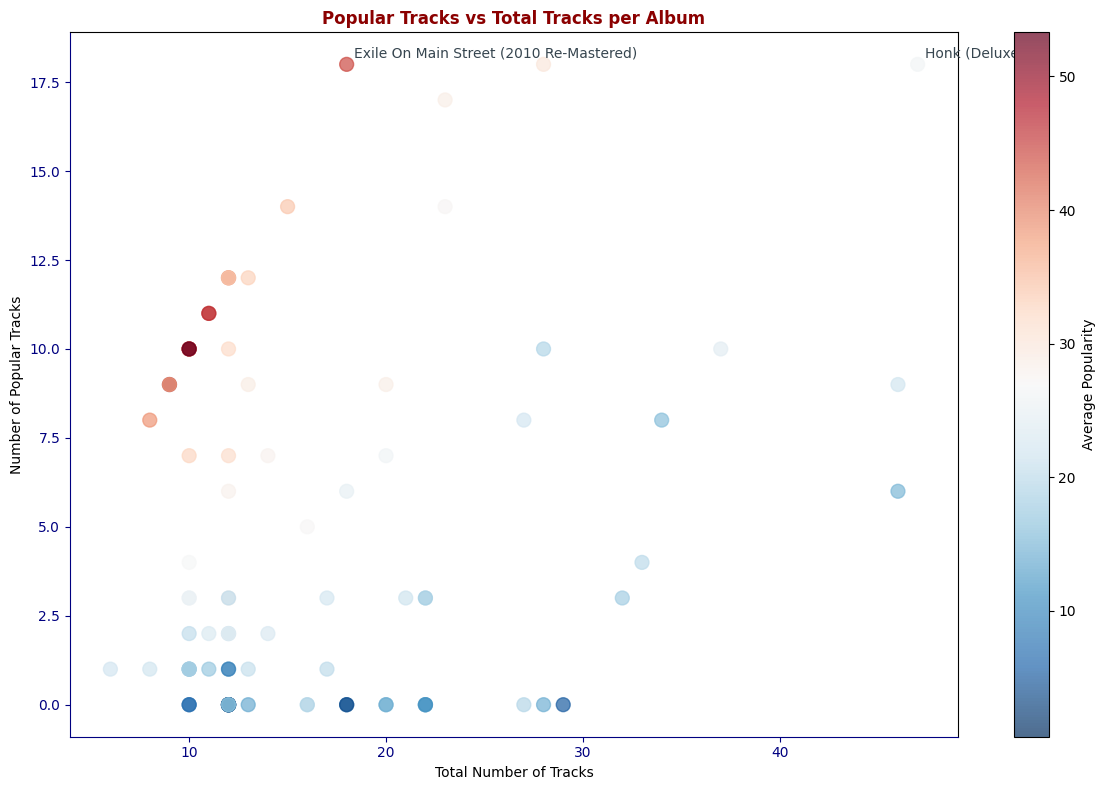

In [2]:
# Identifying the top two albums based on the number of popular tracks and average popularity.
# Review the Insights markdown cell following this code block and output to understand the analysis.

# Define popularity threshold (top 25%)
popularity_threshold = full_tracks['popularity'].quantile(0.75)
full_tracks['is_popular'] = full_tracks['popularity'] >= popularity_threshold

# Calculate popularity metrics for each album
album_popularity = full_tracks.groupby('album').agg({
    'popularity': 'mean',
    'is_popular': ['sum', 'count']
}).reset_index()

# Flatten column names
album_popularity.columns = ['album', 'avg_popularity', 'popular_track_count', 'total_tracks']

# Calculate ratio of popular songs
album_popularity['popular_ratio'] = album_popularity['popular_track_count'] / album_popularity['total_tracks']

# Calculate mean number of popular tracks and avg_popularity threshold
mean_popular_tracks = album_popularity['popular_track_count'].mean()
avg_popularity_threshold = album_popularity['avg_popularity'].quantile(2/3)

# Filter albums based on both popular track count and average popularity
filtered_albums = album_popularity[
    (album_popularity['popular_track_count'] >= mean_popular_tracks)
].sort_values('popular_track_count', ascending=False)

# Display the data for the top albums
print("Top Albums by Number of Popular Tracks and Average Popularity:")
display(filtered_albums[['album', 'popular_track_count', 'total_tracks', 'avg_popularity']])

# Identify and display the top two albums
top_two_albums = filtered_albums.head(2)
print("\nTop Two Albums Recommended Based on Number of Popular Songs and Average Popularity:")
display(top_two_albums[['album', 'popular_track_count', 'total_tracks', 'avg_popularity']])

# Create the scatter plot
fig, ax = plt.subplots(figsize=FIGURE_SIZES['medium'])

# Turn off the grid before creating the scatter plot. We will add custom styling later.
ax.grid(False)

scatter = ax.scatter(album_popularity['total_tracks'], album_popularity['popular_track_count'], 
                     c=album_popularity['avg_popularity'], cmap='RdBu_r', 
                     s=100, alpha=0.7)

# Annotate points for the top two albums
for _, album in top_two_albums.iterrows():
    ax.annotate(album['album'], 
                (album['total_tracks'], album['popular_track_count']),
                xytext=(5, 5), textcoords='offset points',
                color=PLOT_STYLES['text_color'])

ax.set_xlabel('Total Number of Tracks')
ax.set_ylabel('Number of Popular Tracks')

# Add color bar to show average popularity
cbar = plt.colorbar(scatter)
cbar.set_label('Average Popularity')

# Apply custom styling with grid turned off
apply_stones_style(fig, ax, 'Popular Tracks vs Total Tracks per Album', show_grid=False)
plt.tight_layout()
plt.show()

### 🎵 **Insight:** The Rolling Stones' Album Popularity: A Multifaceted Analysis

Our journey through the Rolling Stones' album popularity analysis has revealed the complexity of defining a "top" album:

1. **Popular Track Count:** Initially focusing on the number of popular tracks per album highlighted compilation albums like "Honk (Deluxe)".

2. **Average Popularity:** Considering average popularity revealed that albums like "Exile on Main Street (2010 Re-Mastered)" have higher overall track popularity despite fewer "popular" tracks.

3. **Composite Scoring:** We explored a composite score balancing popular track count, average popularity, and total tracks, providing a more nuanced ranking.

4. **Visualization:** Our scatter plot effectively shows the relationship between total tracks, popular tracks, and average popularity.

This analysis revealed several factors influencing album popularity, including era, remastering, and compilation albums. While we've focused on satisfying our problem statement requirements, this exploration has set the stage for more advanced analyses in our upcoming clustering task.

As we move forward, we'll carry these insights into our deeper exploration of the Rolling Stones' musical characteristics, balancing our data-driven approach with an appreciation for the artistry and cultural impact of their music.

## Tuning into the Stones' Sound: Exploring Audio Feature Distributions

Before we dive deeper into the Rolling Stones' musical characteristics, let's examine the overall distribution of their Spotify catalog's audio features. These histograms provide our first glimpse into the sonic landscape of the Stones' music as interpreted by Spotify's algorithms.

## Revisiting Our Audio Feature Distributions and Correlations

In our previous notebook, we presented histograms of audio features and a correlation matrix as part of our 'final soundcheck' after data cleaning. We're revisiting these visualizations here for several important reasons:

1. **Continuity of Analysis**: By presenting these visualizations again, we ensure that our EDA narrative is complete and self-contained within this notebook. This allows readers to follow our analysis without needing to refer back to the data cleaning notebook.

2. **Fresh Perspective**: Now that we've cleaned our data, we're looking at these distributions with fresh eyes and a deeper understanding of our dataset. This second look might reveal insights we didn't catch the first time.

3. **Foundation for Further Analysis**: These visualizations serve as a foundation for our more advanced analyses in this notebook. By reestablishing our understanding of the basic feature distributions and correlations, we set the stage for our upcoming PCA and feature engineering steps.

4. **Confirmation of Data Integrity**: Reproducing these visualizations allows us to confirm that our data cleaning steps haven't unexpectedly altered the overall structure of our dataset.

As we examine these visualizations again, we'll be paying particular attention to how they inform our upcoming analyses and feature engineering efforts.

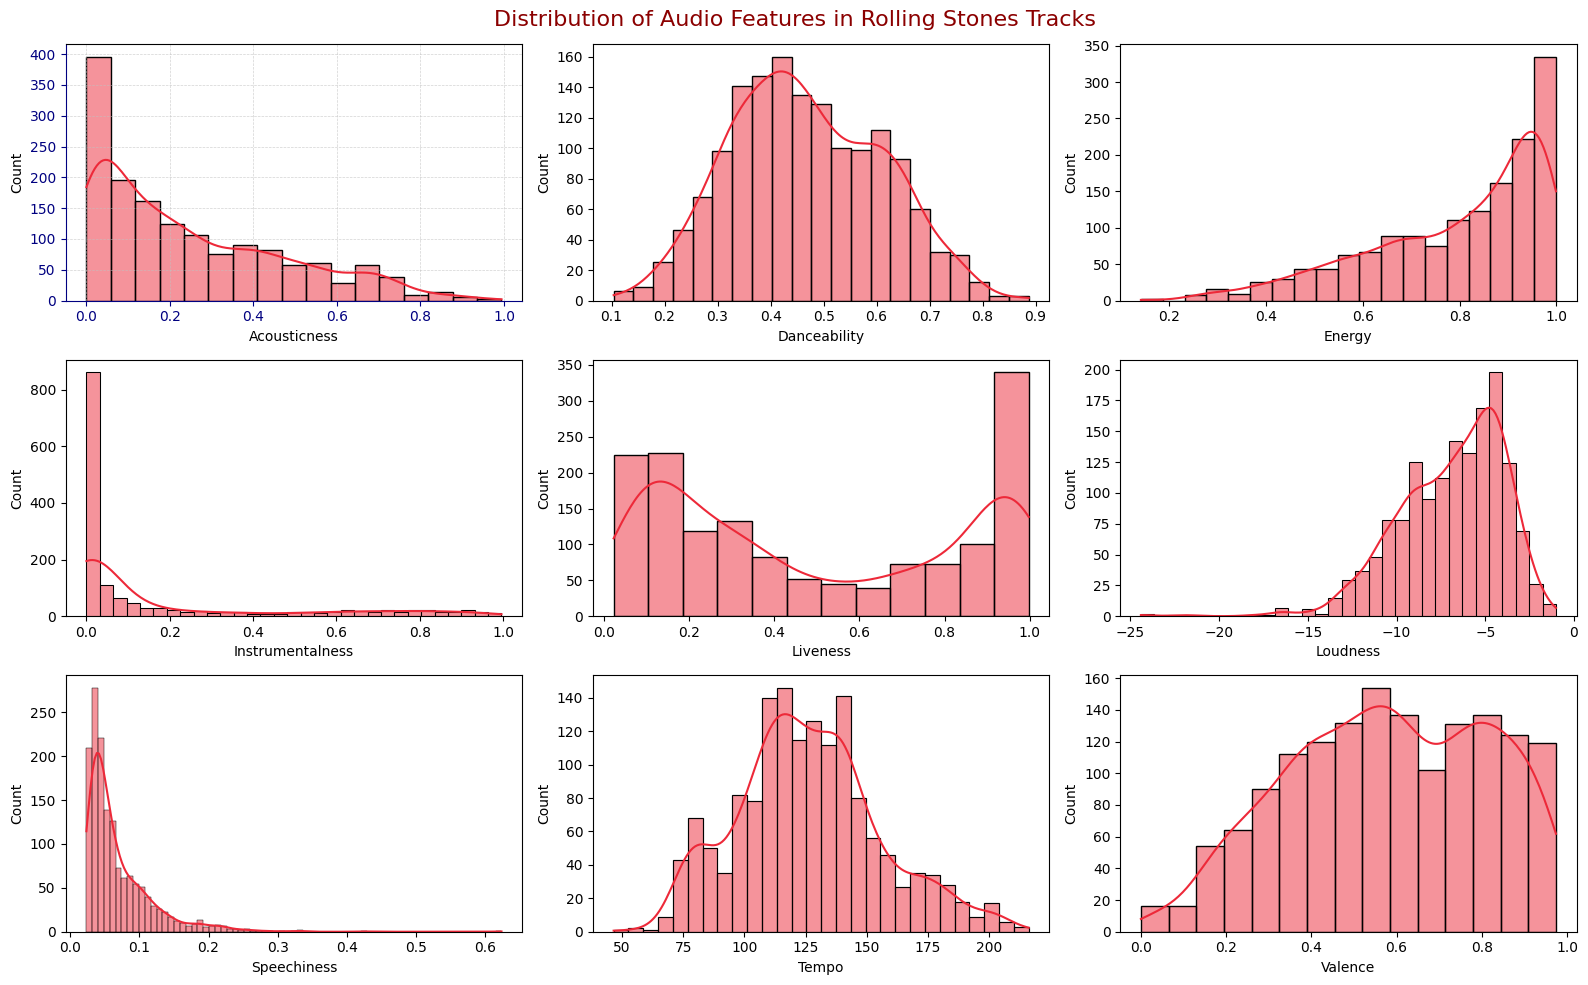

In [3]:
# Distribution visualization
fig, axes = plt.subplots(3, 3, figsize=FIGURE_SIZES['large'])
for i, feature in enumerate(AUDIO_FEATURES):
    sns.histplot(full_tracks[feature], ax=axes[i//3, i%3], kde=True, color=STONES_PALETTE['red'])
    axes[i//3, i%3].set_xlabel(feature.capitalize())  # Capitalize x-axis label

# Apply custom styling to the entire figure
apply_stones_style(fig, fig.axes[0], 'Distribution of Audio Features')

# Set the main title for the entire figure
fig.suptitle('Distribution of Audio Features in Rolling Stones Tracks', fontsize=16, color=PLOT_STYLES['title_color'])

# Remove the title from the first subplot
axes[0, 0].set_title('')

plt.tight_layout()
plt.show()

### The Interplay of Sound: Unraveling Feature Correlations

Just as a rock band's magic comes from how instruments work together, we'll now explore how our audio features harmonize (or clash) with each other. We'll create a correlation matrix to visualize which features tend to play well together and which march to their own beat in the Rolling Stones' catalog.

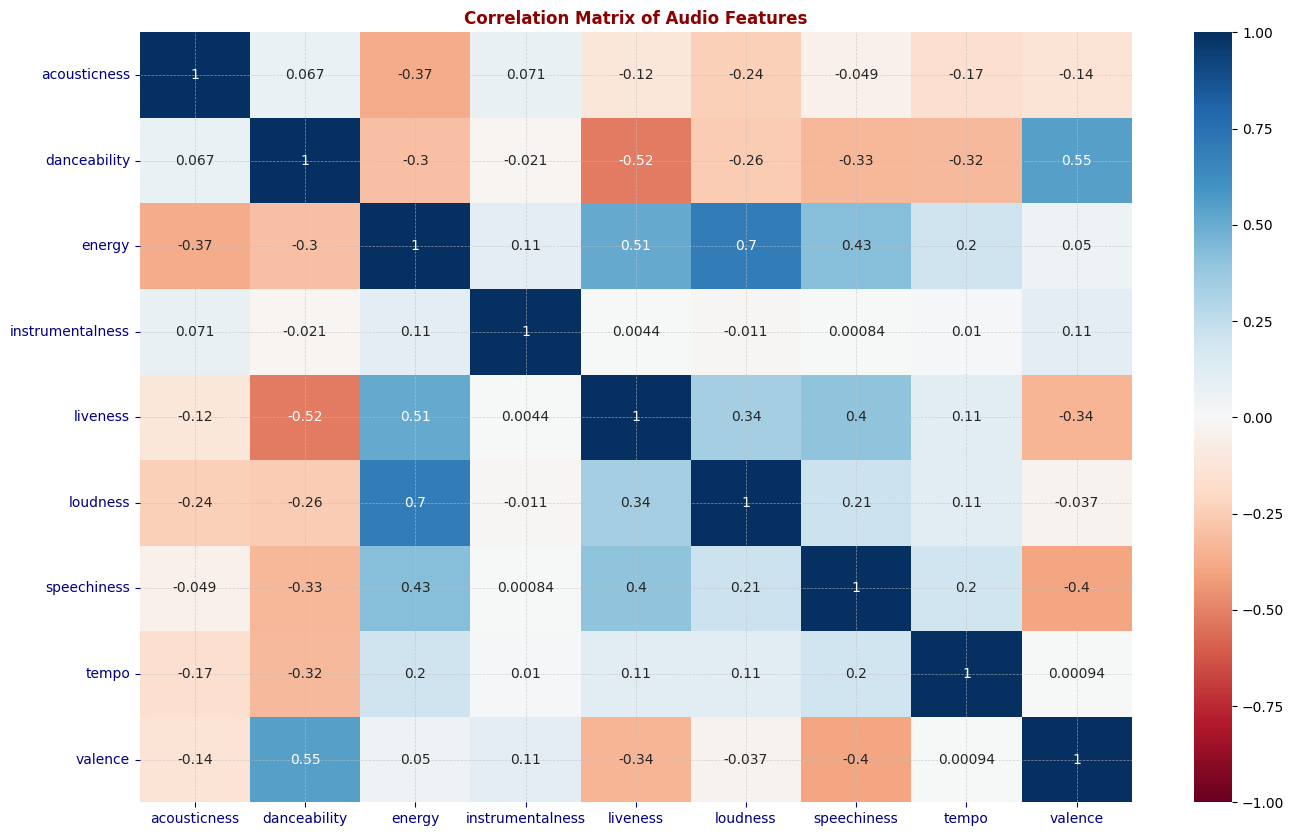

In [4]:
# Correlation matrix
correlation_matrix = full_tracks[AUDIO_FEATURES].corr()
fig, ax = plt.subplots(figsize=FIGURE_SIZES['large'])
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0, ax=ax)
apply_stones_style(fig, ax, 'Correlation Matrix of Audio Features')
plt.show()

### 🎵 **Insight:** Patterns in the Stones' Sound: Decoding the Audio Features

Our analysis of the Rolling Stones' audio features reveals a band with a distinct sonic signature, full of contrasts and complexities:

1. **The Electric Edge** ⚡: The negative correlation (-0.37) between acousticness and energy reflects the Stones' preference for electric, high-energy performances.

2. **Groove and Mood** 💃😊: The strong positive correlation (0.55) between danceability and valence suggests that the Stones' more upbeat tracks tend to be their most danceable.

3. **The Energy-Loudness Connection** 🔊💥: The strong positive correlation (0.7) between energy and loudness underscores the Stones' reputation for powerful, dynamic performances.

4. **Vocal Dominance** 🎤: The low average instrumentalness (0.17) confirms the central role of vocals in the Stones' sound.

5. **Live vs. Studio Dynamics** 🏟️🎚️: The moderate positive correlation (0.51) between liveness and energy suggests that their live-sounding tracks tend to be more energetic.

6. **Tempo Independence** 🥁: Tempo shows relatively weak correlations with other features, suggesting the Stones maintain their signature sound across various tempos.

7. **The Speechiness Factor** 🗣️: The moderate positive correlation (0.43) between speechiness and energy might reflect the use of spoken-word elements in some of their more energetic tracks.

8. **Emotional Range** 😢😁: The positive correlation between valence and danceability suggests that their happier songs tend to be more dance-friendly.

These patterns paint a picture of a versatile band that has mastered the art of blending high energy, electric sound with danceable rhythms and a range of emotional tones. The Stones' ability to maintain their signature sound across different tempos and styles speaks to their musical craftsmanship and adaptability over their long career. 🎸🎶

## 🔍 Leveraging Our Understanding

Now that we've revisited our audio feature distributions and correlations, we're tuned up and ready to rock into our more advanced analyses. Let's break it down:

1. **Refreshed Perspective** 🔄: These visualizations have given us a renewed understanding of the Rolling Stones' musical DNA as captured by Spotify's audio features.

2. **Range and Tendencies** 📊: The distributions highlight the span and central tendencies of each feature - crucial intel for our upcoming feature scaling in PCA.

3. **Feature Interactions** 🔀: Our correlation matrix, showing how these features jam together, will be our backstage pass to interpreting PCA results and engineering new features.

4. **Setting the Stage** 🎭: With this sonic foundation laid down, we're all set to explore how these features connect to song popularity and how we might distill the very essence of the Stones' sound.

5. **Clustering Prep** 🎶➡️🎶: This deep dive into the Stones' audio characteristics will be our guide in identifying the most rockin' features for grouping similar tracks in our upcoming clustering gig.

So, let's crank up the volume and dive into the next phase of our musical data journey! 🎸🔊

## 🎵 Decoding the Stones' Hits: Popularity vs. Audio Features

As we delve deeper into the Rolling Stones' musical journey on Spotify, we face an intriguing question: What makes a Stones track popular in the digital age? To answer this, we'll explore the relationship between song popularity and various audio features, and how these relationships have evolved over time.

Our exploration will include:
1. Calculating correlations between popularity and audio features
2. Visualizing these correlations for easy interpretation
3. Comparing how these relationships differ between older and more recent tracks

This analysis will provide insights into what makes a Rolling Stones song resonate with Spotify listeners and how the band's sound and listener preferences have evolved over the decades.

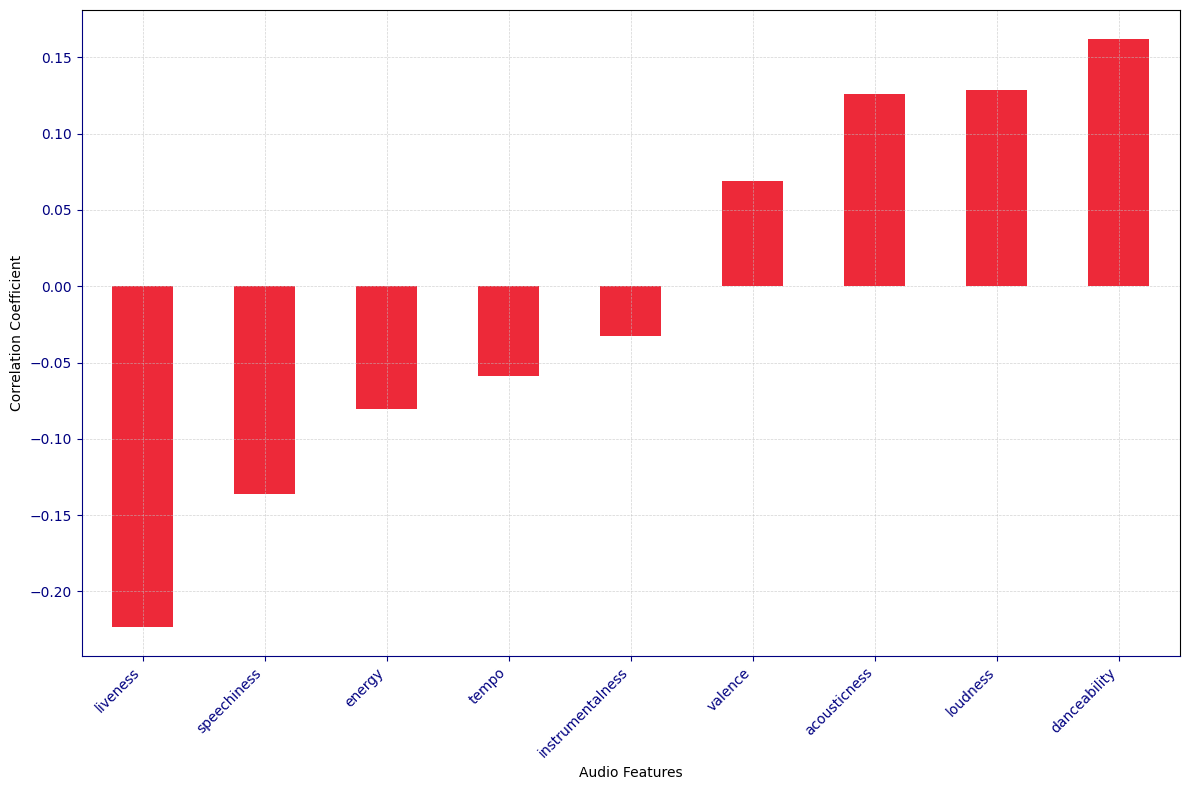

Correlations with popularity:
acousticness        0.125891
danceability        0.161753
energy             -0.080339
instrumentalness   -0.032478
liveness           -0.223062
loudness            0.128766
speechiness        -0.136353
tempo              -0.059103
valence             0.069230
Name: popularity, dtype: float64


<Figure size 1200x800 with 0 Axes>

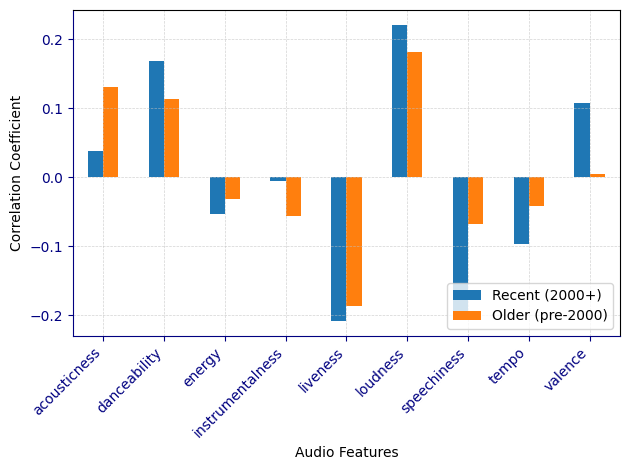

In [5]:
# Calculate correlations between popularity and audio features
popularity_correlations = full_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')

# Visualize correlations
plt.figure(figsize=FIGURE_SIZES['medium'])
popularity_correlations.sort_values().plot(kind='bar', color=STONES_PALETTE['red'])
plt.title('Correlation of Audio Features with Popularity', fontsize=16, color=PLOT_STYLES['title_color'])
plt.ylabel('Correlation Coefficient')
plt.xlabel('Audio Features')
plt.xticks(rotation=45, ha='right')
apply_stones_style(plt.gcf(), plt.gca(), '')
plt.tight_layout()
plt.show()

# Print the correlation values
print("Correlations with popularity:")
print(popularity_correlations)

# Create decade feature and perform time-based analysis
full_tracks['decade'] = pd.to_datetime(full_tracks['release_date']).dt.year // 10 * 10
recent_tracks = full_tracks[full_tracks['decade'] >= 2000]
older_tracks = full_tracks[full_tracks['decade'] < 2000]

recent_corr = recent_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')
older_corr = older_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')

plt.figure(figsize=FIGURE_SIZES['medium'])
pd.DataFrame({'Recent (2000+)': recent_corr, 'Older (pre-2000)': older_corr}).plot(kind='bar')
plt.title('Popularity Correlations: Recent vs Older Tracks', fontsize=16, color=PLOT_STYLES['title_color'])
plt.ylabel('Correlation Coefficient')
plt.xlabel('Audio Features')
plt.xticks(rotation=45, ha='right')
apply_stones_style(plt.gcf(), plt.gca(), '')
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

### 🎵 **Insight:** The Secret Sauce of Stones' Hits

Our analysis of the relationship between the Rolling Stones' track popularity and audio features on Spotify has revealed some fascinating insights:

1. **Dance Floor Dominance** 💃: Danceability emerges as the strongest positive correlator with popularity (0.162), especially in recent years.

2. **Studio Magic vs. Live Energy** 🎚️: Surprisingly, liveness shows the strongest negative correlation (-0.223) with popularity, a trend that has strengthened in recent years.

3. **Acoustic Renaissance** 🪕: Acousticness has shifted from a negative to a positive correlation in recent tracks, suggesting a growing appreciation for the Stones' softer, more acoustic-leaning songs in the digital era.

4. **Energy Paradox** ⚡: Despite the Stones' reputation for high-energy performances, energy shows a slight negative correlation with popularity, particularly in recent tracks.

5. **Loudness Wars** 🔊: The positive correlation with loudness has strengthened in recent years, possibly reflecting changing production styles or listener preferences on streaming platforms.

These findings suggest evolving listener preferences and possibly the band's adaptation to the digital music landscape. The Stones' most popular tracks on Spotify tend to be danceable, well-produced studio recordings with a balance of acoustic elements and controlled energy.

This insight into the "digital DNA" of popular Stones tracks will be invaluable as we move forward with our clustering analysis, helping us understand which features might be most relevant in grouping similar tracks.

## 🎵 Deconstructing the Stones: A Sonic Journey through PCA

As we dive deeper into the Rolling Stones' musical odyssey, we find ourselves with nine audio features to analyze. To simplify this complex sonic landscape, we'll employ Principal Component Analysis (PCA).

PCA will help us distill the essence of the Stones' sound into its core elements. This process is akin to a musical producer identifying the key elements that make a Stones track instantly recognizable.

Due to time and scope constraints, we'll conduct a limited PCA. While the dataset invites deeper exploration, we'll focus on extracting the most crucial insights to lay a foundation for our clustering analysis.

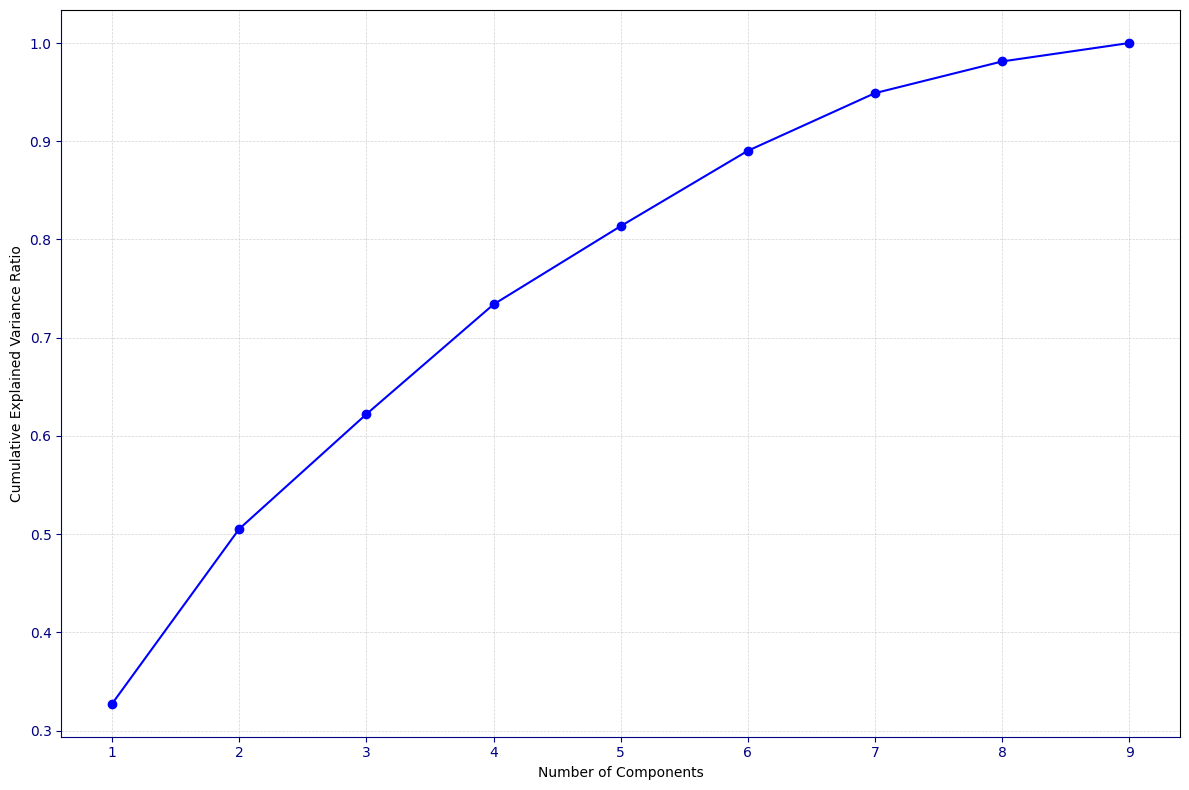

Explained variance ratio by component:
PC1: 0.3275
PC2: 0.1780
PC3: 0.1168
PC4: 0.1117
PC5: 0.0797
PC6: 0.0767
PC7: 0.0587
PC8: 0.0323
PC9: 0.0188

Feature loadings for first two principal components:
                       PC1       PC2
acousticness      0.182853  0.452686
danceability      0.414786 -0.312003
energy           -0.450997 -0.387106
instrumentalness -0.008367 -0.107297
liveness         -0.440919  0.109906
loudness         -0.374139 -0.341441
speechiness      -0.380416  0.186660
tempo            -0.218348 -0.075525
valence           0.253510 -0.605936


In [6]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(full_tracks[AUDIO_FEATURES])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Plot the explained variance ratio
plt.figure(figsize=FIGURE_SIZES['medium'])
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
apply_stones_style(plt.gcf(), plt.gca(), '')
plt.tight_layout()
plt.show()

# Print the explained variance ratio
print("Explained variance ratio by component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

# Print the feature loadings for the first two principal components
print("\nFeature loadings for first two principal components:")
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(AUDIO_FEATURES))],
    index=AUDIO_FEATURES
)
print(loadings[['PC1', 'PC2']])

### 🎵 **Insight:** Sympathy for the Data: PCA Revelations

Our PCA journey through the Rolling Stones' audio features has revealed some electrifying insights:

1. **The Alchemy of Simplification** 🧪: We've transformed our 9 original features into a set of principal components. The first three capture about 62% of the Stones' sonic essence.

2. **The "Groovy vs. Raw" Spectrum** 🕺🎸: Our first component (PC1) reveals the contrast between polished, danceable tracks and raw, high-energy performances.

3. **"Acoustic Blues vs. Electric Joy"** 🪕⚡: PC2 takes us on a journey from the folksy, possibly melancholic corners of the Stones' repertoire to their electric, upbeat anthems.

4. **Painting with Numbers** 🎨: These new components give us a fresh palette to color our understanding of the Stones' music, potentially uncovering unexpected similarities and contrasts.

5. **The Complexity of Rock Royalty** 👑: Even with dimensional reduction, we need several components to truly capture the Stones' sound, confirming the band's musical diversity.

As we prepare to group the Stones' tracks into cohorts, these insights will guide our approach. We've traded our nine separate dials for a mixing board with fewer, but more potent controls.

While our PCA exploration was limited by project constraints, it has provided a deeper understanding of the mathematical structures underlying the Stones' music. This foundation will be crucial as we move into our clustering analysis.

## 🎵 Mixing the Perfect Track: Engineering New Features

As we reach the final chord of our exploratory symphony, it's time to engineer new features that capture the essence of the Rolling Stones' music. Inspired by our journey through the Stones' audio landscape, we'll create two new "super features":

1. **The Groovy Factor**: A measure that attempts to quantify the swagger and dance-appeal of a Stones track.
2. **Raw Energy**: A feature that aims to capture the electrifying power of the Stones' performances.

These new features are carefully crafted blends based on our PCA insights and correlation analysis. They represent our attempt to distill the magic that makes a Rolling Stones track instantly recognizable.

Due to time and scope constraints, we'll limit our feature engineering to these two new features. However, this process opens up exciting possibilities for future, more in-depth analyses.

Summary statistics of new features:
       groovy_factor   raw_energy
count    1508.000000  1508.000000
mean        0.289542     0.383569
std         0.172492     0.310281
min         0.000000     0.010121
25%         0.143732     0.085382
50%         0.260987     0.278448
75%         0.416718     0.707482
max         0.804105     0.946945


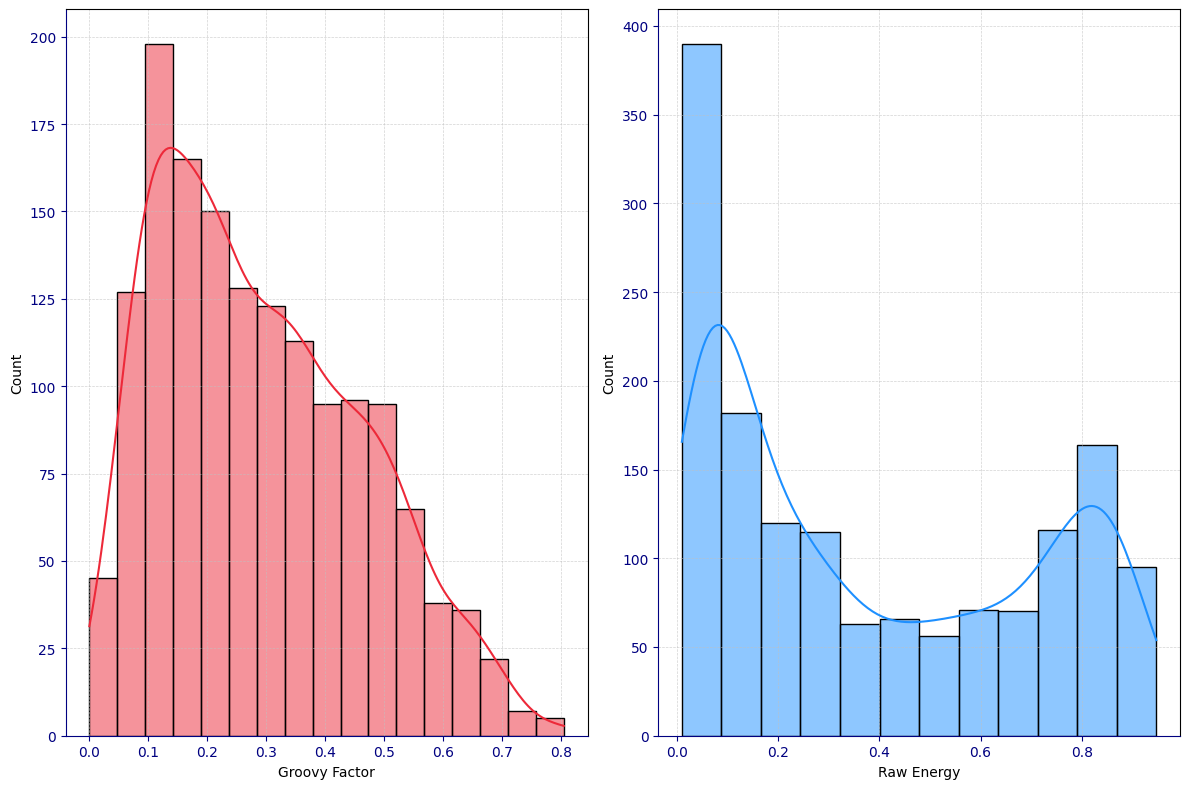

In [7]:
# Feature Engineering
full_tracks['groovy_factor'] = full_tracks['danceability'] * full_tracks['valence']
full_tracks['raw_energy'] = full_tracks['energy'] * full_tracks['liveness'] * (full_tracks['loudness'] + 60) / 60  # Normalize loudness

# Print summary statistics of new features
print("Summary statistics of new features:")
print(full_tracks[['groovy_factor', 'raw_energy']].describe())

# Visualize the distribution of new features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=FIGURE_SIZES['medium'])

sns.histplot(full_tracks['groovy_factor'], kde=True, ax=ax1, color=STONES_PALETTE['red'])
ax1.set_title('Distribution of Groovy Factor')
ax1.set_xlabel('Groovy Factor')

sns.histplot(full_tracks['raw_energy'], kde=True, ax=ax2, color=STONES_PALETTE['blue'])
ax2.set_title('Distribution of Raw Energy')
ax2.set_xlabel('Raw Energy')

apply_stones_style(fig, ax1, '')
apply_stones_style(fig, ax2, '')
plt.tight_layout()
plt.show()

In [8]:
# Generate a new dataset with new our engineered features for use in our cluster analysis
stones_tracks_enriched = full_tracks[['id', 'name', 'album', 'release_date', 'popularity', 'groovy_factor', 'raw_energy']]
save_dataframe(stones_tracks_enriched, 'stones_tracks_enriched.csv')

DataFrame saved to ../data/processed/stones_tracks_enriched.csv


### 🎵 **Insight:** Decoding the Stones' DNA: Insights from Our New Features

Our newly engineered features have provided fresh perspectives on the Rolling Stones' musical DNA:

1. **The Groovy Spectrum** 🕺: The right-skewed distribution of our Groovy Factor (mean: 0.29) suggests a band that balances foot-tapping rhythms with more contemplative moments.

2. **The Energy Divide** ⚡: The bimodal distribution of Raw Energy unveils the band's dual nature - the acoustic troubadours and the electric rockers.

3. **Versatility in Numbers** 🌈: The wide range of both features quantifies the Stones' incredible musical versatility, confirming their comfort with various musical styles.

4. **The Typical Stones Track** 📊: With mean values of 0.29 for Groovy Factor and 0.38 for Raw Energy, we've defined a statistical "average" Stones song, while acknowledging the band's resistance to being pinned down to a single average.

These new features have given us a fresh perspective on the Stones' catalog, providing a numerical backbone to the intuitive understanding of the band's sound. While our feature engineering was limited by project constraints, it has set a solid foundation for our upcoming clustering analysis.

As we move forward, these insights will be crucial in understanding how different aspects of the Stones' music contribute to their overall sound and how these characteristics might group together in our clustering phase.